# **Bank Term Deposit Subscription Prediction**

---

# **Stage 1**

# 1. Data Understanding
This stage involves exploring the data to understand its content, quality, and structure. It is essential for ensuring that the data is fit for purpose and that any potential problems with the data are identified and addressed. The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

## 1.1 Import Libraries

In [ ]:
#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Data Manipulation Library
import pandas as pd
import numpy as np

#Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import chi2
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
from sklearn.feature_selection import mutual_info_regression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 5, 3
rcParams['lines.linewidth'] = 1.5
rcParams['xtick.labelsize'] = 'x-small'
rcParams['ytick.labelsize'] = 'x-small'
rcParams['axes.labelsize'] = 'x-small'

## 1.2 Data Overview

### 1.2.1 Read the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read data
df = pd.read_csv('/content/drive/MyDrive/Coba Coba/final_project_audita/train.csv', delimiter=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 1.2.2 Dataset Preview

In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9724,57,technician,married,secondary,no,93,no,no,unknown,9,jun,82,2,-1,0,unknown,no
10805,41,management,married,tertiary,no,1234,no,no,unknown,17,jun,68,1,-1,0,unknown,no
13681,56,management,single,secondary,no,237,yes,no,telephone,9,jul,236,4,-1,0,unknown,no
22491,30,technician,married,secondary,no,817,yes,no,cellular,22,aug,180,4,-1,0,unknown,no
39457,35,technician,single,secondary,no,204,yes,no,cellular,25,may,236,1,-1,0,unknown,yes


## 1.3 Data Profiling

### 1.3.1 Data Features/Attributes

Note : The column names in the dataset, as seen in the data preview, will be changed for some column names for clarity and better understanding

In [ ]:
# Before the change
cols_before = df.columns.tolist()

In [ ]:
# Rename cols
df.rename(columns={
    'job': 'job_type',
    'marital': 'marital_status',
    'default': 'has_default',
    'housing': 'has_housing_loan',
    'loan': 'has_personal_loan',
    'contact': 'contact_type',
    'day': 'last_contact_day',
    'month': 'last_contact_month',
    'duration': 'last_contact_duration',
    'campaign': 'num_contacts_campaign',
    'pdays': 'days_since_last_contacted',
    'previous': 'contacts_before_campaign',
    'poutcome': 'prev_campaign_outcome',
    'y': 'has_subs_deposit'
}, inplace=True)

# After the change
cols_after = df.columns.tolist()

result = list(zip(cols_before, cols_after))
for pair in result:
    print(f"{pair[0]:<10} -> {pair[1]}")

age        -> age
job        -> job_type
marital    -> marital_status
education  -> education
default    -> has_default
balance    -> balance
housing    -> has_housing_loan
loan       -> has_personal_loan
contact    -> contact_type
day        -> last_contact_day
month      -> last_contact_month
duration   -> last_contact_duration
campaign   -> num_contacts_campaign
pdays      -> days_since_last_contacted
previous   -> contacts_before_campaign
poutcome   -> prev_campaign_outcome
y          -> has_subs_deposit


#### 1.3.1.1 Numerical Features

| Feature Name| Feature Description                                                                       |
|:------------|:------------------------------------------------------------------------------------------|
| `age`       |Represents the client's age in years                                                       |
| `balance`   |Represents the client's average yearly balance in euros                                    |
| `last_contact_day`       |Represents the day of the month when the last contact with client was made                 |
| `last_contact_duration`  |Represents the duration of the last contact in seconds                                     |
| `num_contacts_campaign`  |Indicates the total number of contacts made during the current campaign and for this client, including the last contact|
| `days_since_last_contacted`     |Represents the number of days since the client was last contacted in a previous campaign   |
| `contacts_before_campaign`  |Indicates the total number of contacts made before the current campaign for this client    |

#### 1.3.1.2 Categorical Features

| Feature Name  | Feature Description                                           |
|:--------------|:--------------------------------------------------------------|
| `job_type`         | Describes the client's type of job or occupation              |
| `marital_status`     | Indicates the client's marital status                         |
| `education`   | Specifies the client's educational level                      |
| `has_default`     | Indicates whether the client has credit in default            |
| `has_housing_loan`     | Indicates whether the client has a housing loan               |
| `has_personal_loan`        | Indicates whether the client has a personal loan              |
| `contact_type`	    | Describes the type of communication used by client            |
| `last_contact_month`       | Specifies the month of the year when the last contact occurred|
| `prev_campaign_outcome`    | Describes the outcome of the previous marketing campaign      |

#### 1.3.1.3 Target Feature

| Feature Name  | Feature Description                                           |
|:--------------|:--------------------------------------------------------------|
| `has_subs_deposit`           | Specifies whether the client has subscribed to a term deposit |


### 1.3.2 Data Types, Format and Structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45211 non-null  int64 
 1   job_type                   45211 non-null  object
 2   marital_status             45211 non-null  object
 3   education                  45211 non-null  object
 4   has_default                45211 non-null  object
 5   balance                    45211 non-null  int64 
 6   has_housing_loan           45211 non-null  object
 7   has_personal_loan          45211 non-null  object
 8   contact_type               45211 non-null  object
 9   last_contact_day           45211 non-null  int64 
 10  last_contact_month         45211 non-null  object
 11  last_contact_duration      45211 non-null  int64 
 12  num_contacts_campaign      45211 non-null  int64 
 13  days_since_last_contacted  45211 non-null  int64 
 14  contac

In [ ]:
# Cek NaN value
df.isna().any().any()

False

In [ ]:
# Cek duplicate data
df.duplicated().any()

False

Insights
* Dimensi Dataset:<br>
Dataset terdiri dari 45,211 baris dan 17 kolom.
* Tipe Data Kolom:<br>
~ Dua jenis data utama: int64 (numerik) dan object (non-numerik atau kategorikal)<br>
~ 7 kolom numerik: `age`, `balance`, `last_contact_day`, `last_contact_duration`, `num_contacts_campaign`, `days_since_last_contacted` dan `contacts_before_campaign`<br>
~ 10 kolom kategorikal: `job_type`, `marital_status`, `education`, `has_default`, `has_housing_loan`, `has_personal_loan`, `contact_type`, `last_contact_month`, `prev_campaign_outcome` dan `has_subs_deposit`
* Data Null:<br>
Setiap kolom berisi 45,211 nilai non-null, menunjukkan tidak ada nilai yang hilang (missing values) dalam dataset. Namun beberapa kolom yaitu `job_type`, `education`, `contact_type` dan `prev_campaign_outcome` memiliki nilai 'unknown' yang bisa dianggap sebagai Null

## 1.4 Exploratory Data Analysis (EDA)

### 1.4.1 Univariate Analysis

In this analysis, we explore and summarize the characteristics of a single variable without considering its relationship with other variables. The main goal of univariate analysis is to understand the distribution, central tendency, variability, and any potential outliers or patterns within the data.

In [ ]:
# Grouping Columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

#### 1.4.1.1 Data Summary and Visualization : Numerical Columns

##### 1.4.1.1.1 Descriptive Statistics

In [ ]:
# Describe numerical columns
desc = df[num_cols].describe().T
desc['mode'] = df[num_cols].mode().iloc[0]
desc

,count,mean,std,min,25%,50%,75%,max,mode
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0,32
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0,0
last_contact_day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0,20
last_contact_duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0,124
num_contacts_campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0,1
days_since_last_contacted,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0,-1
contacts_before_campaign,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0,0


##### 1.4.1.1.2 Visualizations : Box PLot, Violin Plot and Distribution Plot

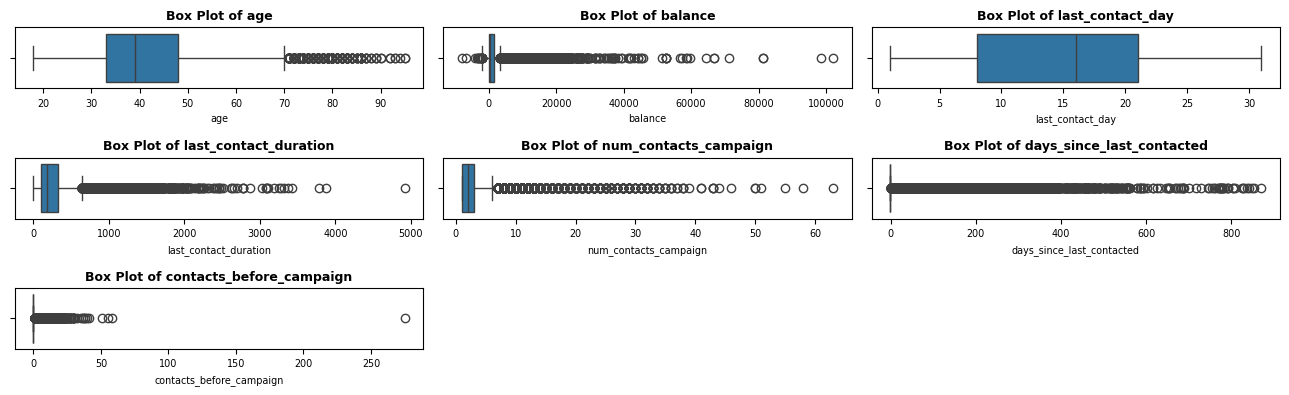

In [ ]:
# Box Plot
plt.figure(figsize=(13,5))
for i in range(0, len(num_cols)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[num_cols[i]], orient = 'h')
    plt.title('Box Plot of ' + num_cols[i], fontsize = 9, fontweight = 'bold')
    plt.tight_layout()

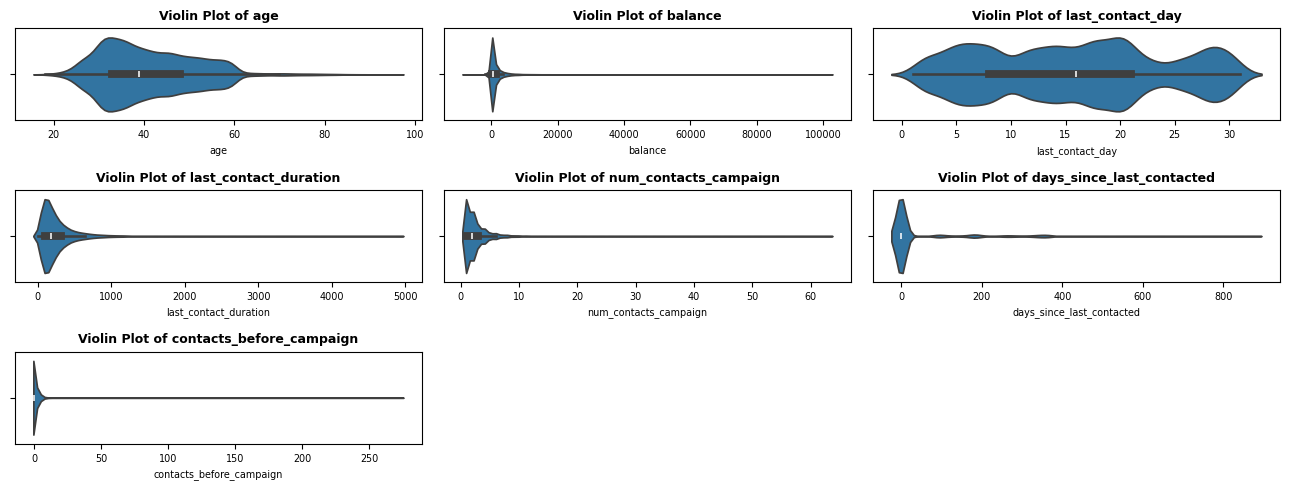

In [ ]:
# Violin Plot
plt.figure(figsize=(13, 5))
for i in range(0, len(num_cols)):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x=df[num_cols[i]], orient = 'h')
    plt.title('Violin Plot of ' + num_cols[i], fontsize = 9, fontweight = 'bold')
    plt.tight_layout()

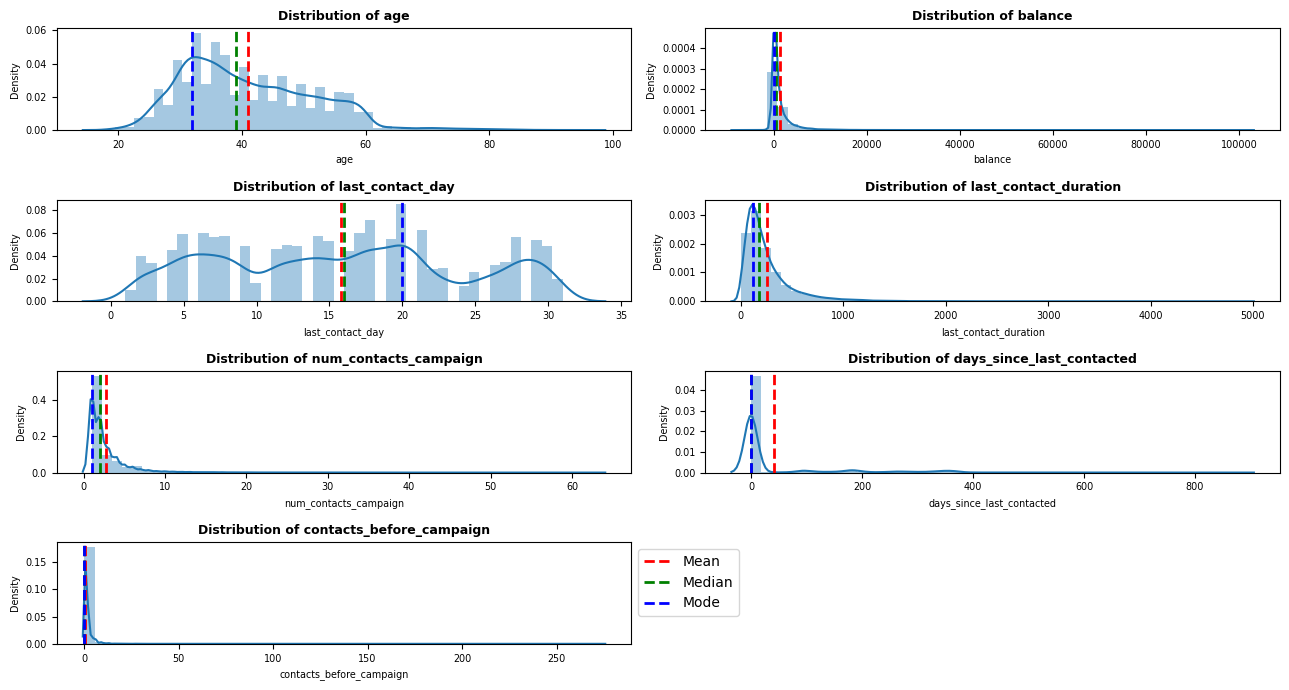

In [ ]:
# Distribution Plot
plt.figure(figsize=(13, 7))
for i in range(0, len(num_cols)):
    plt.subplot(4, 2, i+1)
    sns.distplot(df[num_cols[i]])
    plt.tight_layout()

    mean = np.mean(df[num_cols[i]])
    median = np.median(df[num_cols[i]])
    mode = df[num_cols[i]].mode().values[0]

    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(mode, color='blue', linestyle='dashed', linewidth=2, label='Mode')
    plt.legend().set_visible(False)
    plt.title('Distribution of ' + num_cols[i], fontsize = 9, fontweight = 'bold')
    plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

##### 1.4.1.1.3 Insights

Insight dari Descriptive Analytics:
* Usia Nasabah:<br>
Sebagian besar nasabah (50%) berusia antara 33-48 tahun, dengan usia minimal 18 tahun dan usia maksimal 95 tahun
* Saldo Nasabah:<br>
~ Saldo nasabah memiliki variasi tinggi dan terdapat outlier<br>
~ Sebagian besar nasabah (75%) memiliki saldo rendah (di bawah 1428 euro)<br>
~ 8.33% nasabah memiliki saldo negatif, kemungkinan menandakan adanya hutang ke bank<br>
~ 7.77% nasabah memiliki saldo  0 euro<br>
* Waktu Kontak Terakhir:<br>
~ Rata-rata kontak terakhir dengan nasabah terjadi di pertengahan bulan<br>
~ Sebagian besar kontak terakhir dengan nasabah terjadi pada hari ke 8-21, puncaknya hari ke-20<br>
* Durasi Kontak Terakhir:<br>
~ Sebagian besar durasi kontak terakhir dengan nasabah berada kisaran 100-320 detik, dengan rata-rata sekitar 250 detik<br>
~ Terdapat outlier yang terlihat dari perbedaan yang signifikan antara nilai Q3 dan nilai maksimum<br>
* Jumlah Kontak Selama Campaign:<br>
Sebagian besar nasabah dikontak oleh bank 1-3 kali selama kampanye
* Histori Kontak Sebelumnya:<br>
~ Sebanyak 81.73% nasabah belum pernah dihubungi sejak kampanye sebelumnya atau belum pernah dihubungi<br>
~ Nasabah yang sudah dihubungi sebelumnya (18.27%) memiliki hari berlalu sejak terakhir dihubungi bervariasi antara 1-871 hari, dengan jumlah kontak yang dilakukan oleh bank sebelum kampanye bervariasi 1-275 kali

Insight dari Visualisasi:
* Sebagian besar feature memiliki distribusi yang positively skewed (mean > median)
* Sebagian besar feature memiliki outlier
* feature `last_contact_day`, `last_contact_duration`, `num_contacts_campaign`, `days_since_last_contacted` dan `contacts_before_campaign` distribusinya cenderung mendominasi di sekitar 0

#### 1.4.1.2 Data Summary and Visualization : Categorical Columns

##### 1.4.1.2.1 Descriptive Statistics

In [ ]:
df[cat_cols].describe().T

,count,unique,top,freq
job_type,45211,12,blue-collar,9732
marital_status,45211,3,married,27214
education,45211,4,secondary,23202
has_default,45211,2,no,44396
has_housing_loan,45211,2,yes,25130
has_personal_loan,45211,2,no,37967
contact_type,45211,3,cellular,29285
last_contact_month,45211,12,may,13766
prev_campaign_outcome,45211,4,unknown,36959
has_subs_deposit,45211,2,no,39922


##### 1.4.1.2.2 Visualizations : Distribution Plot

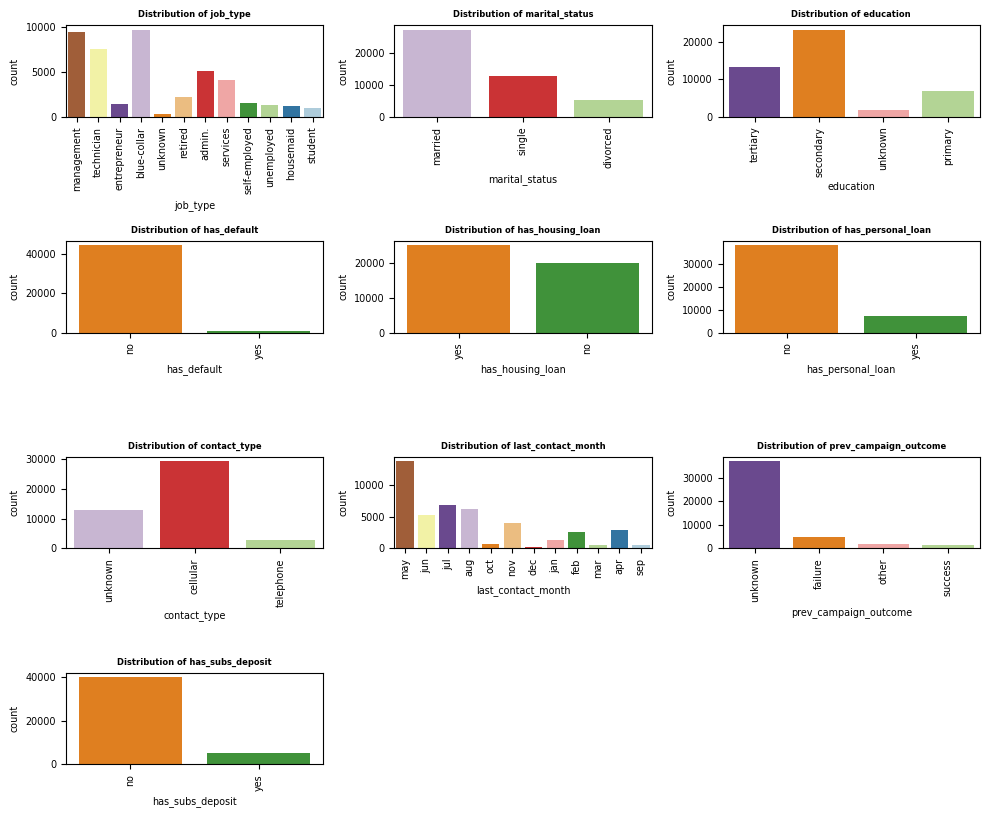

In [ ]:
# Distribution Plot
plt.figure(figsize=(10, 10))
for i in range(0, len(cat_cols)):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x = df[cat_cols[i]], orient = 'h', palette='Paired_r')
    plt.title('Distribution of ' + cat_cols[i], fontsize = 6, fontweight = 'bold')
    plt.xticks(rotation=90)
    plt.tight_layout()

##### 1.4.1.2.3 Visualizations : Target Feature

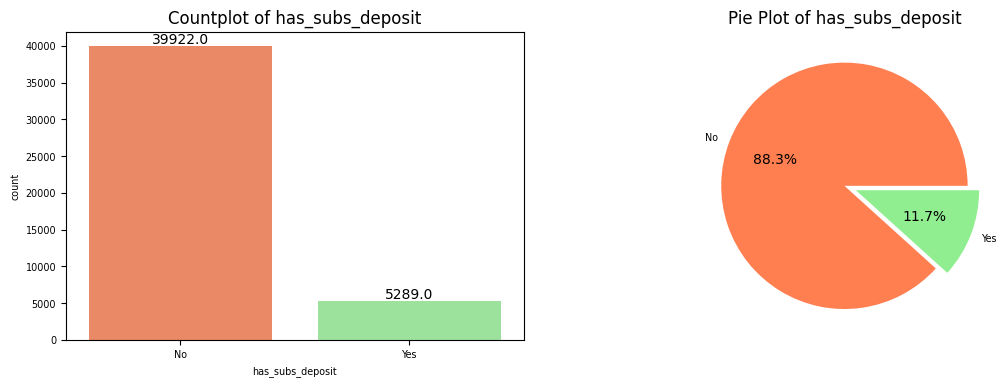

In [ ]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='has_subs_deposit', data=df, palette=['coral', 'lightgreen'])
plt.title('Countplot of has_subs_deposit')
plt.xticks([0, 1], ['No', 'Yes'])
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 5),
                 textcoords='offset points', fontsize=10)
plt.subplot(1, 2, 2)
labels = ['No', 'Yes']
sizes = df['has_subs_deposit'].value_counts(normalize=True) * 100
explode = (0, 0.1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['coral', 'lightgreen'], explode=explode)
plt.title('Pie Plot of has_subs_deposit')

plt.show()

In [ ]:
!pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 14.5 MB/s eta 0:00:00


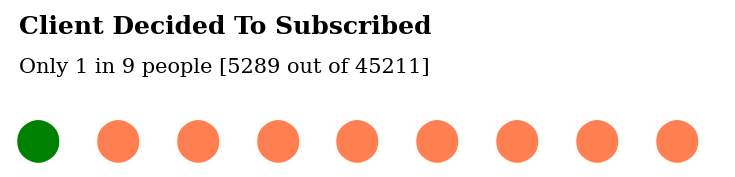

In [ ]:
from pywaffle import Waffle
subs_count = df['has_subs_deposit'].value_counts()

fig = plt.figure(figsize=(5, 2), dpi=150, facecolor='white', FigureClass=Waffle, rows=1, values=[1, 8], colors=['green', 'coral'], characters="⬤",
                 font_size=20, vertical=True,)
fig.text(0.035, 0.78, "Client Decided To Subscribed", fontfamily="serif", fontsize=12, fontweight="bold", color='black',)
fig.text(0.035, 0.65, f"Only 1 in 9 people [{subs_count[1]} out of {len(df)}]", fontfamily="serif", fontsize=10, color='black',)

fig.show()

##### 1.4.1.2.3 Insights

* Job Types:<br>
Blue-collar (21.53%), management (20.92%), dan technician (16.80%) merupakan 3 tipe pekerjaan nasabah paling mendominasi
* Marital Status: <br>
Sebagian besar nasabah (60%) sudah menikah
* Pendidikan: <br>
Sekitar 50% nasabah memiliki pendidikan tingkat secondary, dan hampir 30% memiliki pendidikan tingkat tertiary
* Kredit Default:<br>
Sebagian besar nasabah (98%) tidak memiliki kredit default
* House Loan:<br>
Lebih dari 50% nasabah memiliki house loan
* Personal Loan: <br>
Sebagian besar nasabah (83%) tidak memiliki personal loan
* Contact Type: <br>
Contact type yang paling banyak digunakan oleh nasabah adalah cellular (64%), namun sekitar 28% nasabah memiliki contact type unknown
* Waktu Kontak dengan Nasabah: <br>
Kontak dengan nasabah bank meningkat dan mendominasi saat awal kuarter 2 hingga menjelang akhir kuarter 3
* Hasil Campaign Sebelumnya: <br>
Hasil campaign sebelumnya sangat buruk, sebagian besar hasilnya unknown (81%) dan sekitar 10% gagal
* Jumlah Nasabah yang Berlangganan Deposito:
Dari 45211 nasabah, hanya 5289 nasabah yang memutuskan untuk berlangganan deposito. Proporsinya 11.7% berlangganan dan 88.3% tidak berlangganan. Artinya nasabah lebih banyak yang memutuskan untuk tidak berlangganan deposito

### 1.4.2 Multivariate Analysis
Multivariate analysis allows us to understand relationship between the features in a dataset. In this analysis, we investigate how the values of the features are related to the values of another features and try to identify patterns, associations, or dependencies between them.

Replace has_ columns with 0 and 1

In [ ]:
has_cols = ['has_subs_deposit', 'has_default', 'has_housing_loan', 'has_personal_loan']
for col in has_cols:
    df[col] = df[col].replace({'yes': 1, 'no': 0})

#### 1.4.2.1 Uji Statistik

Mann Whitney U

In [ ]:
from scipy.stats import mannwhitneyu
numerical_columns = ['age', 'balance', 'last_contact_day', 'last_contact_duration', 'num_contacts_campaign', 'days_since_last_contacted', 'contacts_before_campaign']
for column in numerical_columns:
    group1 = df[df['has_subs_deposit'] == 1][column]
    group2 = df[df['has_subs_deposit'] == 0][column]
    u_statistic, p_value = mannwhitneyu(group1, group2)
    print('\nMann-Whitney U Test untuk', column, 'dan has_subs_deposit:')
    print('U statistic:', u_statistic)
    print('P value:', p_value)
    if p_value < 0.05:
        print("Significant relationship (p-value < 0.05)")
    else:
        print("No significant relationship (p-value >= 0.05)")


Mann-Whitney U Test untuk age dan has_subs_deposit:
U statistic: 103915109.5
P value: 0.06281791018697587
No significant relationship (p-value >= 0.05)

Mann-Whitney U Test untuk balance dan has_subs_deposit:
U statistic: 124589983.5
P value: 6.593845808689515e-101
Significant relationship (p-value < 0.05)

Mann-Whitney U Test untuk last_contact_day dan has_subs_deposit:
U statistic: 99974112.0
P value: 3.326078633588937e-10
Significant relationship (p-value < 0.05)

Mann-Whitney U Test untuk last_contact_duration dan has_subs_deposit:
U statistic: 170521757.0
P value: 0.0
Significant relationship (p-value < 0.05)

Mann-Whitney U Test untuk num_contacts_campaign dan has_subs_deposit:
U statistic: 90300543.5
P value: 1.9484904873905108e-71
Significant relationship (p-value < 0.05)

Mann-Whitney U Test untuk days_since_last_contacted dan has_subs_deposit:
U statistic: 125257746.5
P value: 2.4841176503776935e-235
Significant relationship (p-value < 0.05)

Mann-Whitney U Test untuk contac

Chi-Square

In [ ]:
from scipy.stats import chi2_contingency
categorical_columns = ['job_type', 'marital_status', 'education', 'has_default', 'has_housing_loan',
                        'has_personal_loan', 'contact_type', 'last_contact_month', 'prev_campaign_outcome']
results = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['has_subs_deposit'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results[column] = {'Chi-Square': chi2, 'p-value': p}

for column, result in results.items():
    print(f"\n{column}:")
    print(f"Chi-Square: {result['Chi-Square']}")
    print(f"P-Value: {result['p-value']}")
    if result['p-value'] < 0.05:
        print("Significant relationship (p-value < 0.05)")
    else:
        print("No significant relationship (p-value >= 0.05)")


job_type:
Chi-Square: 836.1054877471965
P-Value: 3.337121944935502e-172
Significant relationship (p-value < 0.05)

marital_status:
Chi-Square: 196.49594565603957
P-Value: 2.1450999986791792e-43
Significant relationship (p-value < 0.05)

education:
Chi-Square: 238.92350616407606
P-Value: 1.6266562124072994e-51
Significant relationship (p-value < 0.05)

has_default:
Chi-Square: 22.20224995571685
P-Value: 2.4538606753508344e-06
Significant relationship (p-value < 0.05)

has_housing_loan:
Chi-Square: 874.822448867983
P-Value: 2.918797605076633e-192
Significant relationship (p-value < 0.05)

has_personal_loan:
Chi-Square: 209.61698034978633
P-Value: 1.665061163492756e-47
Significant relationship (p-value < 0.05)

contact_type:
Chi-Square: 1035.714225356292
P-Value: 1.251738325340638e-225
Significant relationship (p-value < 0.05)

last_contact_month:
Chi-Square: 3061.838938445269
P-Value: 0.0
Significant relationship (p-value < 0.05)

prev_campaign_outcome:
Chi-Square: 4391.5065887686615
P-

Insight:
Semua fitur baik fitur numerik atau kategorik terhadap fitur target, uji statistik nya menunjukkan bahwa ada hubungan antara fitur-fitur tersebut dengan fitur target. Sehingga untuk pemilihan fitur mana yang perlu di hilangkan akan menggunakan analisis lain

#  2. Business Insight

In [ ]:
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter

## 2.1 Categorical Features

### job_type

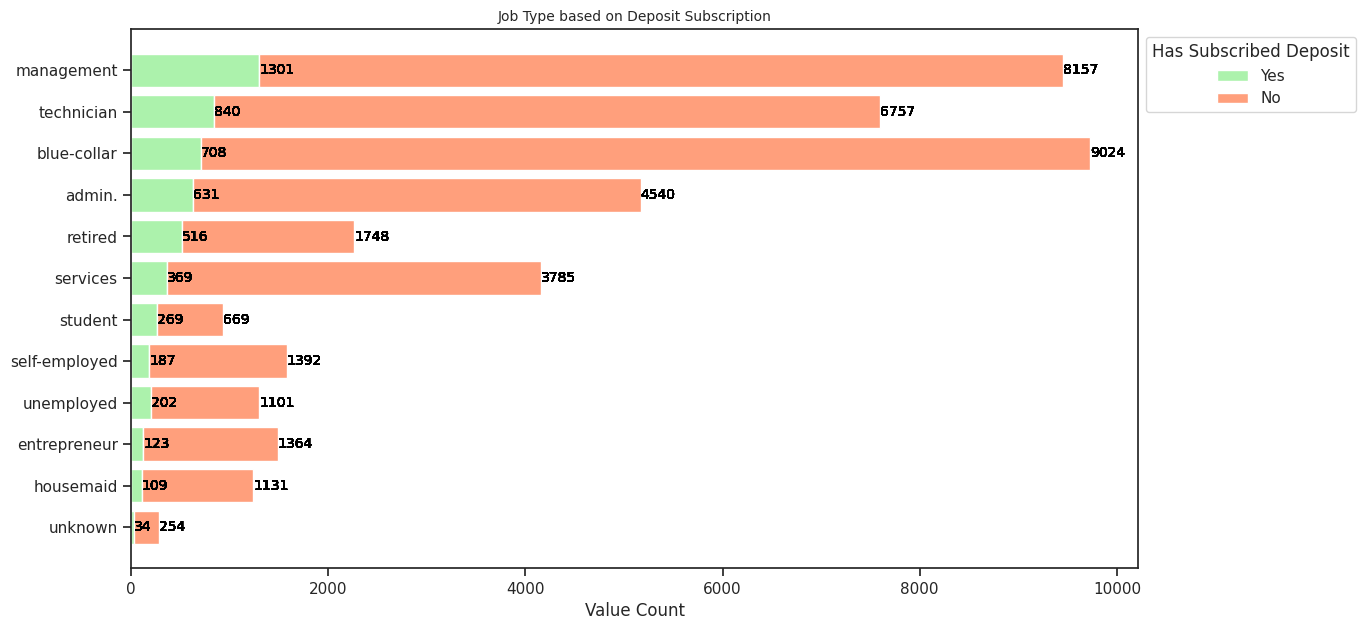

In [ ]:
job_type_order = ['management', 'technician', 'blue-collar','admin.','retired','services','student','self-employed','unemployed','entrepreneur','housemaid','unknown']
df['job_type'] = pd.Categorical(df['job_type'], categories=job_type_order, ordered=True)

plt.figure(figsize=(13, 7))
sns.set(style="ticks")
colors = {0: 'coral', 1: 'lightgreen'}

ax = sns.histplot(data=df, y="job_type", hue="has_subs_deposit", multiple="stack", shrink=0.8, palette={0: "coral", 1: "lightgreen"})
for p in ax.patches:
   for p in ax.patches:
    count = int(p.get_width())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(count, (x, y), ha='left', va='center', color='black', fontsize=10)

ax.legend(title="Has Subscribed Deposit", labels=["Yes", "No"], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylabel("")
plt.title("Job Type based on Deposit Subscription", fontsize=10)
plt.xlabel("Value Count")
#plt.ylabel("Contact Type")
plt.show()

### contact_type

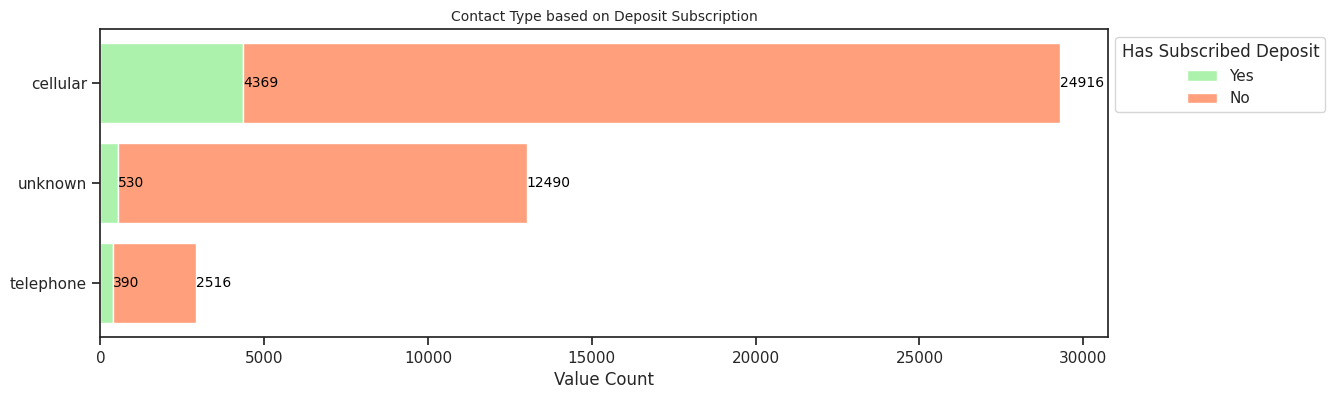

In [ ]:
contact_type_order = ['cellular', 'unknown', 'telephone']
df['contact_type'] = pd.Categorical(df['contact_type'], categories=contact_type_order, ordered=True)

plt.figure(figsize=(13, 4))
sns.set(style="ticks")
colors = {0: 'coral', 1: 'lightgreen'}

ax = sns.histplot(data=df, y="contact_type", hue="has_subs_deposit", multiple="stack", shrink=0.8, palette={0: "coral", 1: "lightgreen"})
for p in ax.patches:
    count = int(p.get_width())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(count, (x, y), ha='left', va='center', color='black', fontsize=10)

ax.legend(title="Has Subscribed Deposit", labels=["Yes", "No"], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylabel("")
plt.title("Contact Type based on Deposit Subscription", fontsize=10)
plt.xlabel("Value Count")
#plt.ylabel("Contact Type")
plt.show()

### marital_status

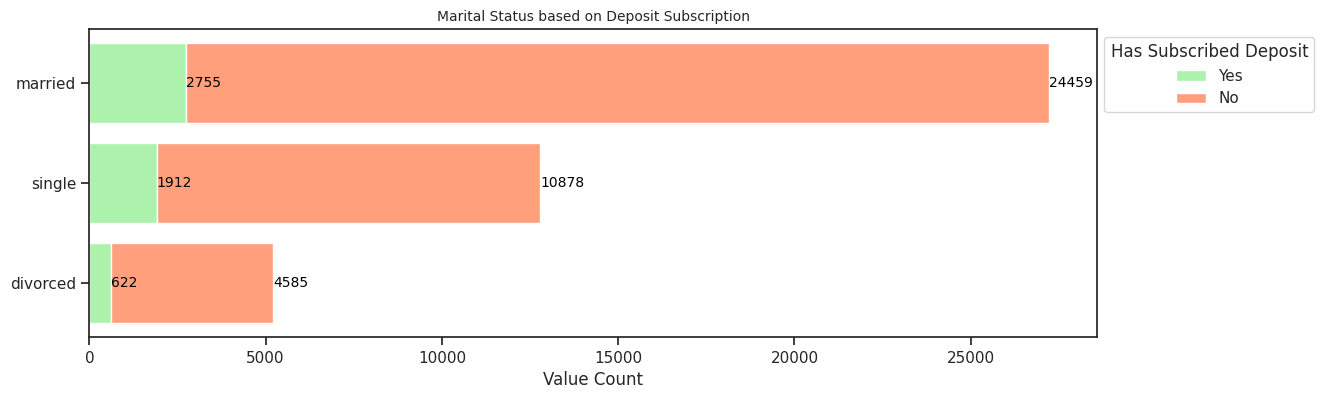

In [ ]:
plt.figure(figsize=(13, 4))
sns.set(style="ticks")
colors = {0: 'coral', 1: 'lightgreen'}

ax = sns.histplot(data=df, y="marital_status", hue="has_subs_deposit", multiple="stack", shrink=0.8, palette={0: "coral", 1: "lightgreen"})
for p in ax.patches:
    count = int(p.get_width())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(count, (x, y), ha='left', va='center', color='black', fontsize=10)

ax.legend(title="Has Subscribed Deposit", labels=["Yes", "No"], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylabel("")
plt.title("Marital Status based on Deposit Subscription", fontsize=10)
plt.xlabel("Value Count")
#plt.ylabel("Contact Type")
plt.show()

### education

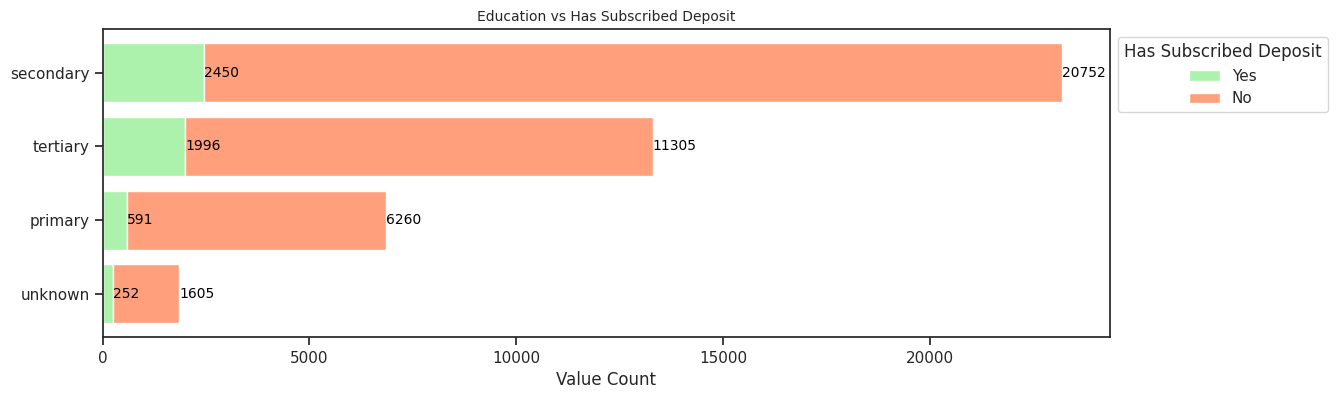

In [ ]:
education_order = ['secondary', 'tertiary', 'primary', 'unknown']
df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)

plt.figure(figsize=(13, 4))
sns.set(style="ticks")
colors = {0: 'coral', 1: 'lightgreen'}

ax = sns.histplot(data=df, y="education", hue="has_subs_deposit", multiple="stack", shrink=0.8, palette={0: "coral", 1: "lightgreen"})
for p in ax.patches:
    count = int(p.get_width())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(count, (x, y), ha='left', va='center', color='black', fontsize=10)

ax.legend(title="Has Subscribed Deposit", labels=["Yes", "No"], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylabel("")
plt.title("Education vs Has Subscribed Deposit", fontsize=10)
plt.xlabel("Value Count")
#plt.ylabel("Contact Type")
plt.show()

### last_contact_month

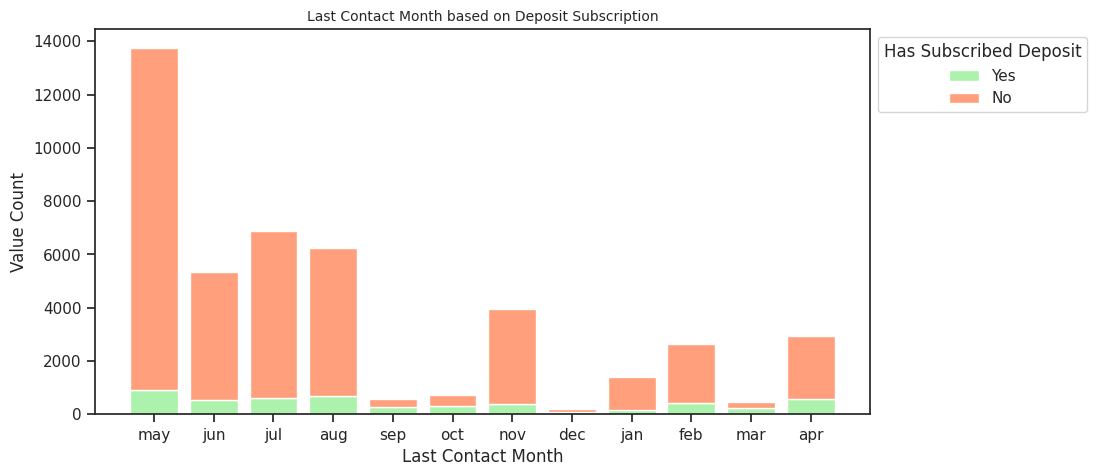

In [ ]:
month_order = ['may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec','jan', 'feb', 'mar', 'apr',]
df['last_contact_month'] = pd.Categorical(df['last_contact_month'], categories=month_order, ordered=True)

plt.figure(figsize=(10, 5))
sns.set(style="ticks")
colors = {0: 'coral', 1: 'lightgreen'}

ax = sns.histplot(data=df, x="last_contact_month", hue="has_subs_deposit", multiple="stack", shrink=0.8, palette=colors)


ax.legend(title="Has Subscribed Deposit", labels=["Yes", "No"], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel("")
plt.title("Last Contact Month based on Deposit Subscription", fontsize=10)
plt.ylabel("Value Count")
plt.xlabel("Last Contact Month")
plt.show()

### prev_campaign_outcome

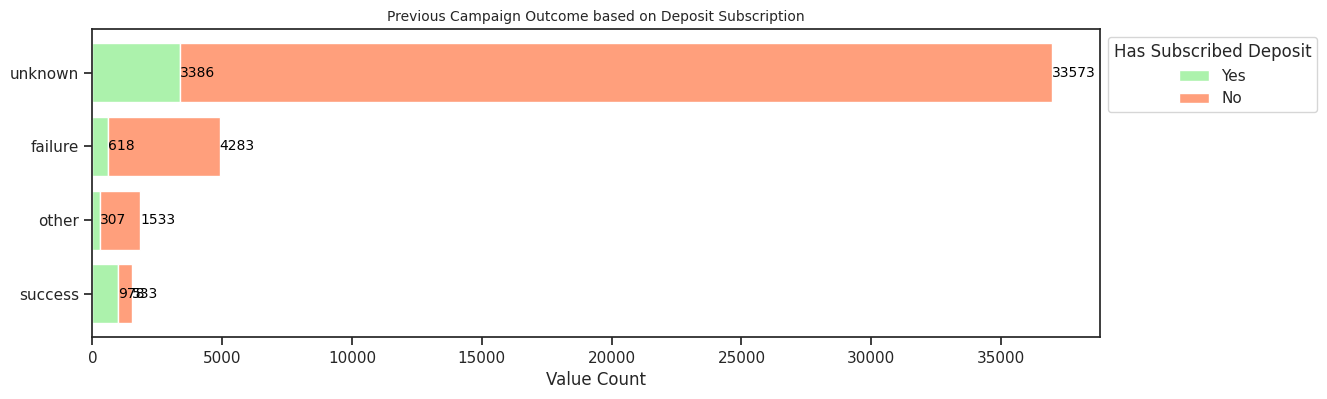

In [ ]:
plt.figure(figsize=(13, 4))
sns.set(style="ticks")

ax = sns.histplot(data=df, y="prev_campaign_outcome", hue="has_subs_deposit", multiple="stack", shrink=0.8, palette={0: "coral", 1: "lightgreen"})
for p in ax.patches:
    count = int(p.get_width())
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(count, (x, y), ha='left', va='center', color='black', fontsize=10)

ax.legend(title="Has Subscribed Deposit", labels=["Yes", "No"], bbox_to_anchor=(1, 1), loc='upper left')
#ax.set_ylabel("")
plt.title("Previous Campaign Outcome based on Deposit Subscription", fontsize=10)
plt.xlabel("Value Count")
plt.ylabel("")
plt.show()

### has_default

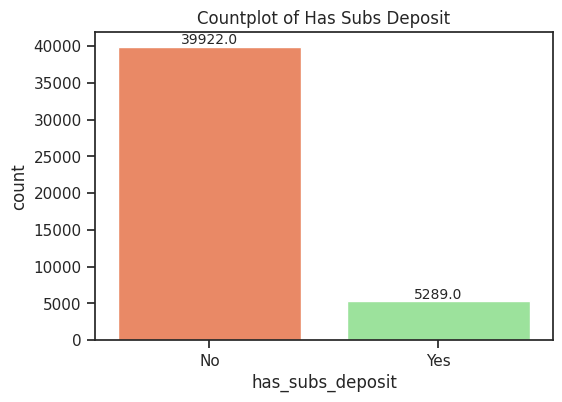

In [ ]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='has_subs_deposit', data=df, palette=['coral', 'lightgreen'])
plt.title('Countplot of Has Subs Deposit')
plt.xticks([0, 1], ['No', 'Yes'])
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 5),
                 textcoords='offset points', fontsize=10)


### has_housing_loan

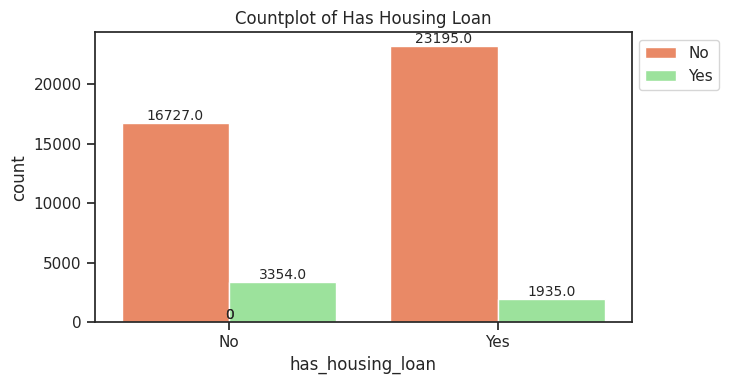

In [ ]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='has_housing_loan', data=df, palette=['coral', 'lightgreen'], hue ='has_subs_deposit')
plt.title('Countplot of Has Housing Loan')
plt.xticks([0, 1], ['No', 'Yes'])
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 5),
                 textcoords='offset points', fontsize=10)
ax1.legend(['No', 'Yes'], bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


### has_personal_loan

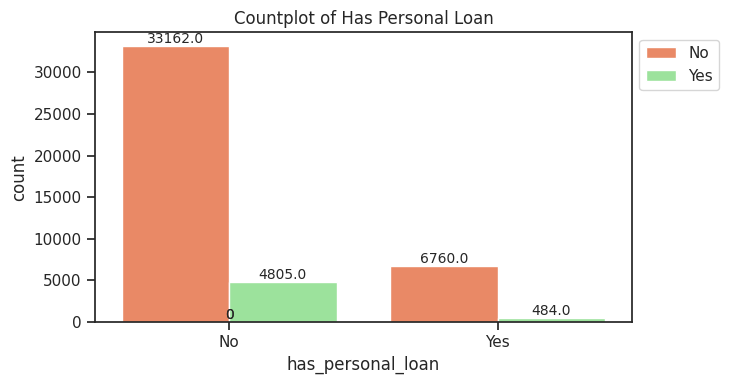

In [ ]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='has_personal_loan', data=df, palette=['coral', 'lightgreen'], hue ='has_subs_deposit')
plt.title('Countplot of Has Personal Loan')
plt.xticks([0, 1], ['No', 'Yes'])
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 5),
                 textcoords='offset points', fontsize=10)
ax1.legend(['No', 'Yes'], bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


## 2.2 Numerical Features

### last_contact_day

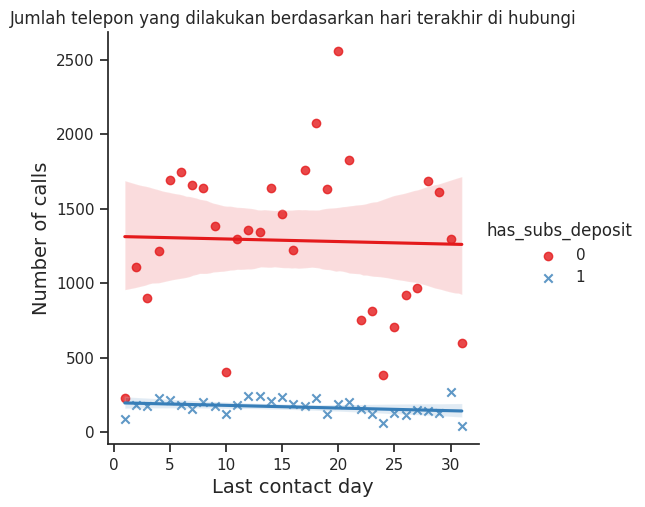

In [ ]:
contact_day_sum = df.groupby(['last_contact_day', 'has_subs_deposit'], as_index = False)['age'].count()
contact_day_sum.rename(columns = {'age':'count'}, inplace = True)
contact_day_sum

sns.lmplot(x="last_contact_day", y="count", hue="has_subs_deposit", data=contact_day_sum,
           markers=["o", "x"], palette="Set1");
plt.xlabel(r'Last contact day', fontsize = 14)
plt.ylabel(r'Number of calls', fontsize = 14)
plt.title(r'Jumlah telepon yang dilakukan berdasarkan hari terakhir di hubungi')
plt.show()

### last_contact_duration

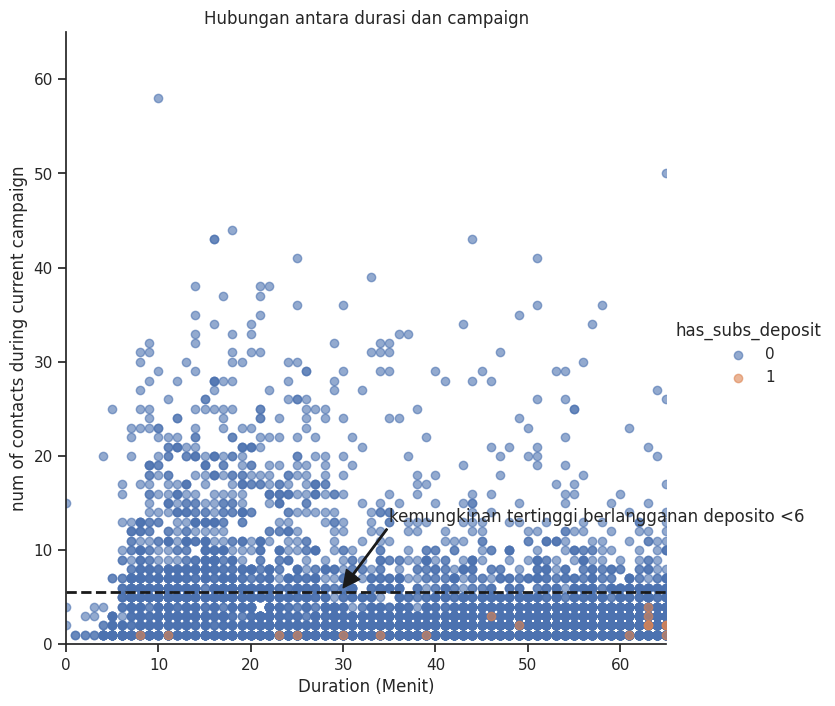

In [ ]:
dur_cam = sns.lmplot(x='last_contact_duration', y='num_contacts_campaign',data = df,
                     hue = 'has_subs_deposit',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('num of contacts during current campaign')
plt.xlabel('Duration (Menit)')
plt.title('Hubungan antara durasi dan campaign')

# Annotation
plt.axhline(y=5.5, linewidth=2, color="k", linestyle='--')
plt.annotate('kemungkinan tertinggi berlangganan deposito <6',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

## 2.3 Business Insight : Feature Labeling (tambahan)

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/Coba Coba/final_project_audita/train.csv',delimiter=';')

In [ ]:
#Membuat Duplikasi Dataset agar dataset master tidak berubah, dan memuat unique seq untuk tiap baris data
df_copy = df_new.copy().reset_index()
df_copy.rename(columns={'index':'seq'}, inplace=True)
df_copy.head(2)

,seq,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


##### Feature Labeling 'age'

Pada tahap ini data unique dari fitur 'age' akan di ekstraksi untuk mendapatkan/mengembangkan lebih banyak insight dengan pertimbangan sebagai berikut :
- Usia >11 tahun = Child (kanak-kanak)
- Usia 12-25 tahun = Teenager (remaja)
- Usia 26-45 tahun = Adult (dewasa)
- Usia lebih dari 46 tahun = Elderly (lansia)

In [ ]:
#Membuat fungsi untuk mencari klsifikasi umur
def kelas_umur(x):
    umur = x
    if umur <= 11:
        result = 'child'
    elif umur <= 25:
        result = 'teenager'
    elif umur <= 45:
        result = 'adult'
    else:
        result = 'elderly'
    return result

df_copy['age_class'] = df_copy['age'].apply (lambda x: kelas_umur(x))
df_copy.sample(2)

,seq,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_class
166,166,52,management,married,tertiary,no,271,yes,no,unknown,5,may,99,1,-1,0,unknown,no,elderly
2857,2857,42,admin.,divorced,secondary,no,1076,yes,no,unknown,14,may,213,1,-1,0,unknown,no,adult


### Feature Labeling 'balance'
Pada tahap ini data unique dari fitur 'balance' akan di klasifikasikan untuk mendapatkan/mengembangkan lebih banyak insight dengan pertimbangan sebagai berikut :
- Balance < 0 = minus_balance
- Balance 0 = No_balance
- Balance <450000000 = Low_balance (Pembulatan Q2)
- Balance 450000000-1430000000 = Medium_balance (Pembulatan Q3)
- Balance >1430000000Usia = High_balance (Angka diatas Q3)
Angka diatas didapatkan dari perhitungan Quartil 1, 2, dan 3.

In [ ]:
#Describe fitur balance sebagai acuan kalasifikasi
print(df_copy['balance'].describe())

#Membuat fungsi untuk mencari klsifikasi balance
def cek_balance(x):
    balan = x
    if balan < 0:
        result = 'minus'
    elif balan == 0:
        result = 'nul'
    elif balan < 448:
        result = 'low'
    elif balan < 1428:
        result = 'medium'
    else:
        result = 'high'
    return result

df_copy['balance_class'] = df_copy['balance'].apply (lambda x: cek_balance(x))
df_copy.sample(2)


count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


,seq,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_class,balance_class
29337,29337,43,management,married,primary,no,73,no,no,cellular,2,feb,182,2,-1,0,unknown,no,adult,low
6702,6702,48,admin.,single,secondary,no,1150,yes,no,unknown,28,may,357,1,-1,0,unknown,no,elderly,medium


### Feature Labeling 'day'
Pada tahap ini data unique dari fitur 'day' akan di ekstrak untuk mendapatkan/mengembangkan lebih banyak insight dengan pertimbangan sebagai berikut :
- Day 1-7 = week_1
- Day 8-14 = week_2
- Day 15-21 = week_3
- Day 22-31 = week_4

In [ ]:
#Membuat fungsi untuk mencari klsifikasi day
def cek_week(x):
    day = x
    if day <= 7:
        result = 'week_1'
    elif day <= 14:
        result = 'week_2'
    elif day <= 21:
        result = 'week_3'
    else:
        result = 'week_4'
    return result

df_copy['day_class'] = df_copy['day'].apply (lambda x: cek_week(x))
df_copy.sample(2)

,seq,age,job,marital,education,default,balance,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,y,age_class,balance_class,day_class
15998,15998,34,services,single,secondary,no,418,yes,no,cellular,...,jul,247,1,-1,0,unknown,no,adult,low,week_4
33062,33062,37,blue-collar,single,secondary,no,1127,yes,no,cellular,...,apr,72,2,281,1,failure,no,adult,medium,week_3


### Feature Labeling 'month'
Pada tahap ini data unique dari fitur 'month' akan di ekstrak untuk mendapatkan/mengembangkan lebih banyak insight dengan pertimbangan pembagian sesuai kuartal dalam satu tahun :
- Month jan-mar = 1
- Month apr-jun = 2
- Month jul-sep = 3
- Month oct-dec = 4

In [ ]:
#Membuat fungsi untuk mencari klsifikasi month
def cek_kuartal(x):
    month = x
    q1 = ['jan','feb', 'mar']
    q2 = ['apr','may', 'jun']
    q3 = ['jul','aug', 'sep']
    q4 = ['oct','nov', 'dec']

    if month in q1:
        result = 1
    elif month in q2:
        result = 2
    elif month in q3:
        result = 3
    else:
        result = 4
    return result

df_copy['quarter'] = df_copy['month'].apply (lambda x: cek_kuartal(x))
df_copy.sample(2)

,seq,age,job,marital,education,default,balance,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,y,age_class,balance_class,day_class,quarter
22762,22762,36,management,divorced,tertiary,no,2397,no,no,cellular,...,93,9,-1,0,unknown,no,adult,high,week_4,3
31731,31731,24,admin.,single,secondary,no,5,no,no,cellular,...,66,1,330,1,failure,no,teenager,low,week_1,2


### Feature Labeling 'duration'
Pada tahap ini data unique dari fitur 'duration' akan di ekstrak untuk mendapatkan/mengembangkan lebih banyak insight dengan pertimbangan sebagai berikut :
- Duration 0 = none (tidak terhubung)
- Duration 1-180 (-+ 3menit) = short (rentang Q0-Q2)
- Duration 181-319 (-+ 5 menit) = medium (rentang Q2-Q3)
- Duration diatas 319 (>5menit) = long (lebih dari Q3)

In [ ]:
#Describe fitur duration
print(df_copy['duration'].describe())

#Membuat fungsi untuk mencari klsifikasi day
def cek_durasi(x):
    durasi = x
    if durasi <= 0:
        result = 'none'
    elif durasi <= 180:
        result = 'short'
    elif durasi <= 319:
        result = 'medium'
    else:
        result = 'long'
    return result

df_copy['duration_class'] = df_copy['duration'].apply (lambda x: cek_durasi(x))
df_copy.sample(2)

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


,seq,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,y,age_class,balance_class,day_class,quarter,duration_class
10318,10318,59,management,married,tertiary,no,3165,yes,no,unknown,...,2,-1,0,unknown,no,elderly,high,week_2,2,medium
21459,21459,58,admin.,married,secondary,no,451,no,no,cellular,...,5,-1,0,unknown,no,elderly,medium,week_3,3,long


### Feature Labeling 'campaign'
Pada tahap ini data unique dari fitur 'duration' akan di ekstrak untuk mendapatkan/mengembangkan lebih banyak insight dengan pertimbangan sebagai berikut :
- Campaign 1-2 = soft (Q1-Q2)
- Campaign 3-8 = medium (Q3-percentile 95)   
- Campaign > 8 = hard (> percentile 95)

In [ ]:
#Cek quartile fitur campaign
print(df_copy['campaign'].describe())

#Cek persentile 90 dari fitur campaign
a = np.percentile(df_copy['campaign'], 95)
print()
print(f'percentile 95 dari fitur campaign = {a}')

#Membuat fungsi untuk mencari klsifikasi campaign
def camp_num(x):
    camp = x
    if camp <= 2:
        result = 'soft'
    elif camp <= 8:
        result = 'medium'
    else:
        result = 'hard'
    return result

df_copy['camp_count'] = df_copy['campaign'].apply (lambda x: camp_num(x))
df_copy.sample(2)

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

percentile 95 dari fitur campaign = 8.0


,seq,age,job,marital,education,default,balance,housing,loan,contact,...,pdays,previous,poutcome,y,age_class,balance_class,day_class,quarter,duration_class,camp_count
10788,10788,41,technician,married,secondary,no,1385,no,no,unknown,...,-1,0,unknown,no,adult,medium,week_3,2,short,soft
34546,34546,26,technician,married,secondary,no,18,yes,yes,cellular,...,-1,0,unknown,no,adult,low,week_1,2,short,soft


### Feature Labeling 'pdays'
Pada tahap ini data unique dari fitur 'pdays' akan di ekstrak untuk mendapatkan/mengembangkan lebih banyak insight dengan pertimbangan sebagai berikut :
- pdays -1 = nill
- pdays <=7 = in_week
- pdays <=21 = weeks
- pdays <=31 = in_month
- pdays >31 = months
- pdays >365 = in_year
- pdays >730 = years

In [ ]:
#Membuat fungsi untuk mencari klsifikasi pdays
def hitung_pdays(x):
    pdays = x
    if pdays <0:
        result = 'nill'
    elif pdays <=7:
        result = 'in_week'
    elif pdays <=21:
        result = 'weeks'
    elif pdays <=31:
        result = 'in_month'
    elif pdays >31:
        result = 'months'
    elif pdays >= 365:
        result = 'in_year'
    else:
        result = 'years'
    return result

df_copy['pdays_count'] = df_copy['pdays'].apply (lambda x: hitung_pdays(x))
df_copy.sample(2)

,seq,age,job,marital,education,default,balance,housing,loan,contact,...,previous,poutcome,y,age_class,balance_class,day_class,quarter,duration_class,camp_count,pdays_count
3774,3774,35,blue-collar,married,secondary,no,-613,yes,no,unknown,...,0,unknown,no,adult,minus,week_3,2,long,soft,nill
8031,8031,39,admin.,single,secondary,no,2854,yes,no,unknown,...,0,unknown,no,adult,high,week_1,2,short,soft,nill


### Feature Labeling 'previous'
Pada tahap ini data unique dari fitur 'previous' akan di ekstrak untuk mendapatkan/mengembangkan lebih banyak insight dengan pertimbangan sebagai bahwa fitur previous berisi data yang sama dengan fitur campaign, maka klasifikasinya dibuat berdasarkan fitur campaign:
- Previous 0 = no
- Previous 1-2 = soft (Q1-Q2)
- Previous 3-8 = medium (Q3-percentile 95)   
- Previous > 8 = hard (> percentile 95)

In [ ]:
#Membuat fungsi untuk mencari klsifikasi previous
def prev_num(x):
    prev = x
    if prev == 0:
        result = 'no'
    elif prev <= 2:
        result = 'soft'
    elif prev <= 8:
        result = 'medium'
    else:
        result = 'hard'
    return result

df_copy['previous_count'] = df_copy['previous'].apply (lambda x: prev_num(x))
df_copy.sample(2)

,seq,age,job,marital,education,default,balance,housing,loan,contact,...,poutcome,y,age_class,balance_class,day_class,quarter,duration_class,camp_count,pdays_count,previous_count
40294,40294,49,management,married,tertiary,no,561,no,no,cellular,...,unknown,yes,elderly,medium,week_3,2,short,soft,nill,no
6459,6459,31,blue-collar,married,secondary,no,175,yes,no,unknown,...,unknown,no,adult,low,week_4,2,short,medium,nill,no


#### Drop, Rename, Transform, Reorder Fitur Hasil Labeling

In [ ]:
#Drop fitur yang sudah di klasifikasi
df_copy = df_copy.drop(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], axis=1)

# #Rename fitur
df_copy = df_copy.rename(columns={'age_class':'age', 'balance_class':'balance','day_class':'day', 'duration_class':'duration', 'camp_count':'campaign',
                                  'pdays_count':'pdays', 'previous_count':'previous'})

# #Merubah dtype object menjadi kategorical
object = list(df_copy.select_dtypes(include=['object']))
df_copy[object] = df_copy[object].astype('category')
df_copy['quarter'] = df_copy['quarter'].astype('category')

#Reorder susunan fitur
df_copy = df_copy[df_copy.columns[[0,11,1,2,3,4,12,5,6,7,13,8,14,15,16,17,18,9,10]]]

df_copy.sample(2)

,seq,age,job,marital,education,default,balance,housing,loan,contact,day,month,quarter,duration,campaign,pdays,previous,poutcome,y
12820,12820,elderly,blue-collar,married,primary,no,minus,no,no,cellular,week_1,jul,3,short,soft,nill,no,unknown,no
36096,36096,adult,admin.,single,tertiary,no,low,yes,no,cellular,week_2,may,2,medium,soft,months,soft,other,no
